In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from logistics import new_cav_model , J_analytical_new


def 

# 1. limit $\gamma \tau << 1 $

In [ ]:
# ---- parameter definition ------------

gamma = 1 
tau = 0.1 
phi = np.pi 
t_max = 50*tau
dt = tau/30




In [ ]:
# numerical calculation 
cavity = new_cav_model(gamma,phi,tau,0)
cavity.evolve(t_max,dt)
t,e = cavity.excited_state([1,0])
w_ref = np.sqrt(gamma/tau)

In [14]:
# analytical calculation 
t_a = np.linspace(0,t_max,1000)
e_an = J_analytical_new(gamma,phi,tau,t)

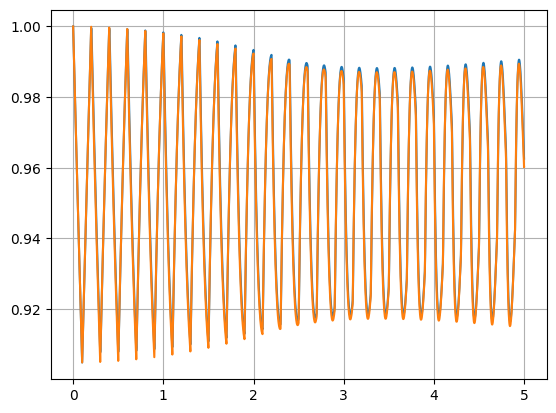

In [15]:
plt.plot(t,np.abs(e))
plt.plot(t,np.abs(e_an)**2)
plt.grid()
plt.show()

# 2. limit $\gamma \tau \approx  1$ 

# 3. limit $\gamma \tau >> 1 $ 